In [1]:
# Assume that pyCDCS and lxml are already installed
import cdcs
import pandas as pd
import lxml.etree as et
import requests
import json

# define which MRR instances to query
nmrr_instance = cdcs.CDCS('https://materials.registry.nist.gov/', username='')
mdf_mrr_instance = cdcs.CDCS('https://mrr.materialsdatafacility.org/', username='')

# define search parameters
search_string = 'optimade'
# oqmd URL = 'http://oqmd.org/optimade/structures?filter=_oqmd_band_gap=0'
# optimade_query = 'optimade/structures?filter=_oqmd_band_gap=0'

# oqmd URL = 'http://oqmd.org/optimade/v1/structures?filter=chemical_formula_reduced=%22O2Si%22'
optimade_filter = '/v1/structures?filter=chemical_formula_reduced=%22O2Si%22'

# query MRR instances
records_nmrr = nmrr_instance.query(mongoquery={"$text":{"$search": search_string}})
records_mdf = mdf_mrr_instance.query(mongoquery={"$text":{"$search": search_string}})

returned_results = [records_nmrr, records_mdf]
records = pd.concat(returned_results)
records

,id,template,workspace,user_id,title,xml_content,creation_date,last_modification_date,last_change_date,template_title
0,61e6b7876e07c8cff02ec404,61e6b6d3051f5e060530b206,61e6b6d3051f5e060530b205,53,optimade-python-tools,"<Resource xmlns:xsi=""http://www.w3.org/2001/XM...",2021-12-02T21:27:43.420000Z,2021-12-02T21:28:44.562000Z,2021-12-02T21:28:44.400000Z,res-md.xsd
0,61e6c52048175bd317b973a7,61e6c4a1266710654b351df2,61e6c4b06be34c420cd142f0,6,oqmd.xml,"<Resource xmlns:xsi=""http://www.w3.org/2001/XM...",2021-12-22T20:26:31.744000Z,2022-02-01T15:04:27.462000Z,2022-02-01T15:04:27.413000Z,res-md.xsd


In [2]:
# parse returned MRR records using the lxml etree library
# for each matching record, perform query via the API (if applicable)

num_returned_records = records.shape[0]

for r in range(0,num_returned_records):
    print(records.iloc[r].title)
    xml_root = et.fromstring(records.iloc[r].xml_content)
    #print(records.iloc[r].xml_content)
    
    # map 'default_ns' to the MRR res-md schema 
    # (e.g., 'http://schema.nist.gov/xml/res-md/1.0wd-02-2017')
    # to support queries.
    # lxml info and tutorials: https://lxml.de/tutorial.html
    
    nsmap = {('default_ns',ns[1]) for ns in xml_root.xpath('//namespace::*') if (ns[0]==None)}
    
    # if baseURL is not empty, then perform query of that resource
    for link in xml_root.xpath(".//default_ns:baseURL", namespaces=nsmap):
        database_info = requests.get(link.text + "/v1/info").json()
        structure_info = requests.get(link.text + "/v1/info/structures").json()


        optimade_query = link.text + optimade_filter
        print('query: ', optimade_query)
        r = requests.get(optimade_query)
        results_json = r.json()
        data = results_json["data"]
        while results_json["meta"]["more_data_available"] and results_json["links"].get("next"):
            results_json = requests.get(results_json["links"]["next"]).json()
            data.extend(results_json["data"])
        #print(json.dumps(results_json, indent=4))

optimade-python-tools
oqmd.xml
query:  http://oqmd.org/optimade/v1/structures?filter=chemical_formula_reduced=%22O2Si%22


In [3]:
print(json.dumps(database_info, indent=2))

{
  "meta": {
    "api_version": "1.0.0",
    "query": {
      "representation": "/info"
    },
    "more_data_available": false,
    "schema": "https://schemas.optimade.org/openapi/v1.0/optimade_index.json",
    "provider": {
      "name": "OQMD",
      "description": "Open Quantum Materials Database",
      "prefix": "oqmd",
      "homepage": "http://oqmd.org/"
    }
  },
  "data": {
    "type": "info",
    "id": "/",
    "attributes": {
      "api_version": "1.0.0",
      "available_api_versions": [
        {
          "url": "http://oqmd.org/optimade/v1/",
          "version": "1.0.0"
        }
      ],
      "formats": [
        "json",
        "xml",
        "yaml"
      ],
      "entry_types_by_format": {
        "json": [
          "structures"
        ],
        "xml": [
          "structures"
        ],
        "yaml": [
          "structures"
        ]
      },
      "available_endpoints": [
        "structures",
        "info",
        "links",
        "versions"
      ],
 

In [4]:
# parse OQMD results
list(results_json)

['links', 'resource', 'data', 'meta']

In [5]:
len(data)

176

In [6]:
results_json["data"][0]

{'id': 5460876,
 'type': 'structures',
 'attributes': {'last_modified': None,
  'chemical_formula_reduced': 'O2Si',
  'chemical_formula_anonymous': 'A2B',
  'nelements': 2,
  'elements': ['O', 'Si'],
  'nsites': 72,
  'lattice_vectors': [[13.554085, 0.0, 0.0],
   [-6.777043, 11.738182, 0.0],
   [0.0, 0.0, 8.920599]],
  'species_at_sites': ['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si',
   'Si'],
  'nperiodic_dimensions': 3,
  'structure_features': [],
  '

In [7]:
oqmd_fields_dict = {field: structure_info["data"]["properties"][field] for field in structure_info["data"]["properties"]}

In [8]:
df = pd.DataFrame(columns=[k for k in oqmd_fields_dict.keys() if k.startswith("_oqmd") or k == "nsites"])

for i in range(0, len(data)):
    df = df.append({k:v for k,v in data[i]["attributes"].items() if k in df.columns}, ignore_index=True)
    
df

,nsites,_oqmd_direct_site_positions,_oqmd_entry_id,_oqmd_calculation_id,_oqmd_icsd_id,_oqmd_band_gap,_oqmd_delta_e,_oqmd_volume,_oqmd_stability,_oqmd_prototype,_oqmd_spacegroup
0,3,NaN,8352,8668,44271,2.245,-1.8130,23.3550,1.261,CaF2,Fm-3m
1,6,NaN,6607,18953,35536,5.596,-3.0728,101.0910,0.001,Cristobalite high,Fd-3m
2,6,NaN,13603,20480,75648,6.374,-3.0694,82.5578,0.004,SiO2(I4-2d),I-42d
3,6,NaN,20578,20771,162660,6.268,-3.0722,83.4472,0.001,None,I-42d
4,9,NaN,16288,54541,93975,5.869,-3.0680,121.1590,0.006,"Quartz,high",P6422
...,...,...,...,...,...,...,...,...,...,...,...
171,72,NaN,21631,3751030,170490,5.908,-3.0165,1195.3400,0.057,None,Pm-3n
172,72,NaN,111543,3761286,170518,5.947,-2.9951,969.9510,0.079,None,R-3
173,72,NaN,98601,3766291,155684,5.588,-3.0663,1264.1000,0.007,None,P1
174,72,NaN,32269,3770962,176,5.988,-3.0543,943.9910,0.019,SiO2(mS144),Cc


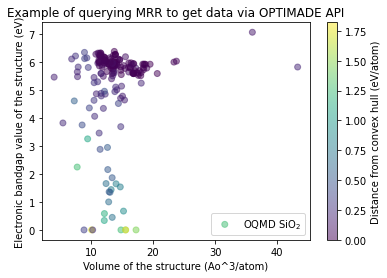

In [9]:
# plot returned data.
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x_field = "_oqmd_volume"
y_field = "_oqmd_band_gap"
c_field = "_oqmd_stability"
scatter = ax.scatter(
       df[x_field] / df["nsites"], 
       df[y_field],
       c=df[c_field], alpha=0.5, label=f'{database_info["meta"]["provider"]["name"]} SiO$_2$')
plt.colorbar(scatter, label="Distance from convex hull (eV/atom)")

x_desc, x_unit = oqmd_fields_dict[x_field]["description"], oqmd_fields_dict[x_field]["unit"] + "/atom"
y_desc, y_unit = oqmd_fields_dict[y_field]["description"], oqmd_fields_dict[y_field]["unit"]

ax.set(
       xlabel=f"{x_desc} ({x_unit})", 
       ylabel=f"{y_desc} ({y_unit})", 
       title='Example of querying MRR to get data via OPTIMADE API')
plt.legend(loc='lower right')
plt.show()

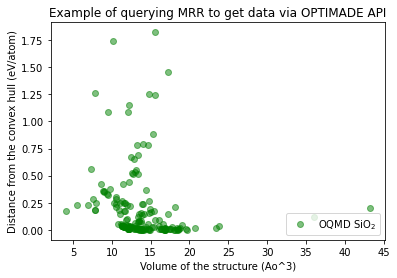

In [10]:
# plot returned data.
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x_field = "_oqmd_volume"
y_field = "_oqmd_stability"
ax.scatter(
       df[x_field] / df["nsites"], 
       df[y_field],
       c="g", alpha=0.5, label=f'{database_info["meta"]["provider"]["name"]} SiO$_2$')

x_desc, x_unit = oqmd_fields_dict[x_field]["description"], oqmd_fields_dict[x_field]["unit"]
y_desc, y_unit = "Distance from the convex hull", oqmd_fields_dict[y_field]["unit"]

ax.set(
       xlabel=f"{x_desc} ({x_unit})", 
       ylabel=f"{y_desc} ({y_unit})", 
       title='Example of querying MRR to get data via OPTIMADE API')
plt.legend(loc='lower right')
plt.show()

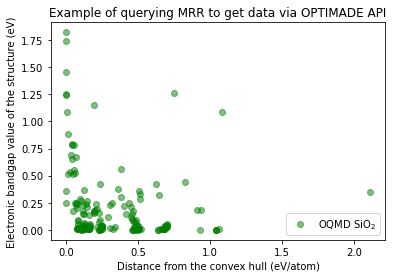

In [11]:
# plot returned data.
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
x_field = "_oqmd_band_gap"
y_field = "_oqmd_stability"
ax.scatter(
       df[x_field] / df["nsites"], 
       df[y_field],
       c="g", alpha=0.5, label=f'{database_info["meta"]["provider"]["name"]} SiO$_2$')

x_desc, x_unit = "Distance from the convex hull", oqmd_fields_dict[y_field]["unit"]
y_desc, y_unit = oqmd_fields_dict[x_field]["description"], oqmd_fields_dict[x_field]["unit"]

ax.set(
       xlabel=f"{x_desc} ({x_unit})", 
       ylabel=f"{y_desc} ({y_unit})", 
       title='Example of querying MRR to get data via OPTIMADE API')
plt.legend(loc='lower right')
plt.show()